In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
df=pd.read_csv('svr_input.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
df.shape

(10, 3)

In [16]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [17]:
for col in df.columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df.head()

,Position,Level,Salary
0,0,0,0
1,4,1,1
2,8,2,2
3,5,3,3
4,3,4,4


In [18]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print('r2_score :',r2_score(y_test,y_pred))
print('mean_squared_error :',mean_squared_error(y_test,y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred))

r2_score : 0.9993187220560337
mean_squared_error : 0.008345654813587698
mean_absolute_error :  0.09092074740484413


R_square score 0.99 in this case becuase our dataset very small

<Axes: xlabel='Salary'>

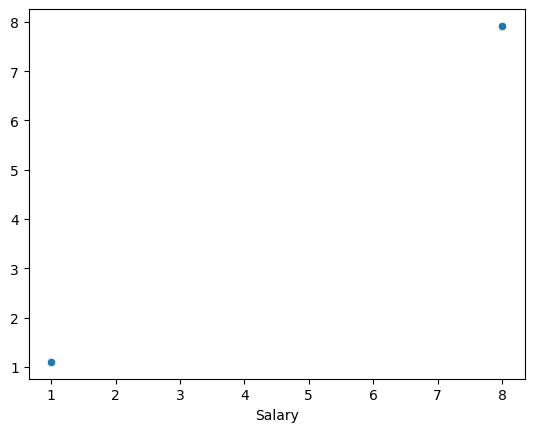

In [21]:
sns.scatterplot(x=y_test,y=y_pred)